### IMPORTATIONS

In [26]:
from time import time

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

from kmerlib.running_window import *
from kmerlib.spectrum import *
from kmerlib.tools import *
from utils.term_colors import *

import json

# plot config
sns.set()
sns.set_context("talk")

In [16]:
%matplotlib notebook
#%matplotlib tk

In [17]:
# Plot colors
blue = "#089FB2"
green = "#C0C94F"
orange = "#FC933E"
red = "#F23957"

### LOAD DATA

In [4]:
with open('./data/running_window_fulldataset.json', 'r') as f:
    data = json.load(f)

## K-mer study

In [27]:
def kmer_study(
        win_len, color=blue, normalize=False, filt_len=20, max_k=None
    ):
    step = win_len // 100
    for s in data:
        # Initialization
        name = s["name"]
        type_ = s["type"]
        seq = s["seq"]
        Ks = [int(k) for k in s["distances"]]
        Ks.sort()
        if max_k is not None:
            Ks = [k for k in Ks if k <= max_k]
        print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
        
        sns.set_palette(sns.dark_palette(blue, len(Ks)))
        plt.figure()
        # Iterate on k
        for k in Ks:
            distances = s["distances"][str(k)][str(win_len)]
            if normalize:
                distances = (np.array(distances) - np.mean(distances)) / np.std(distances)
                distances = running_average(distances, filt_len)
            bp = list(range(0, len(distances)*step, step))
            plt.plot(bp, distances, label="K = {}".format(k))
            
        # Configure plot
        plt.xlabel('Base pair')
        plt.ylabel('Distance')
        plt.title(name.replace("_", " "), fontstyle='italic')
        plt.ticklabel_format(
            style="sci", axis="x", scilimits=(0,3), useOffset=False)
        plt.legend()
    plt.show()

Taille de la fenêtre =  1000.

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


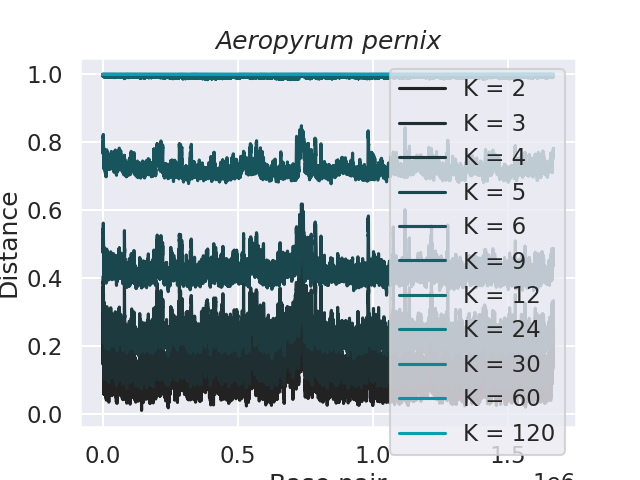

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


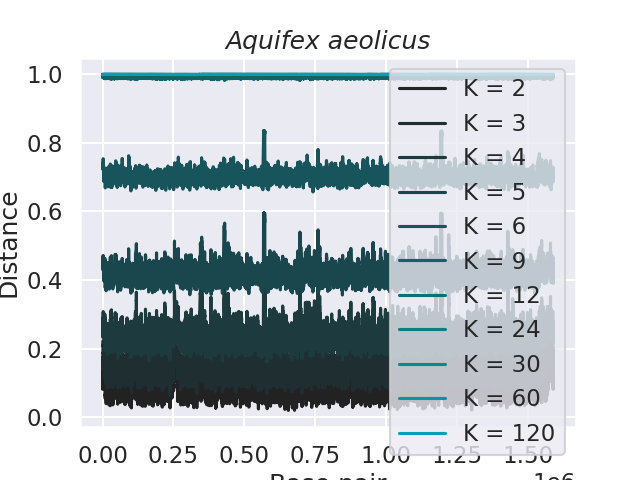

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


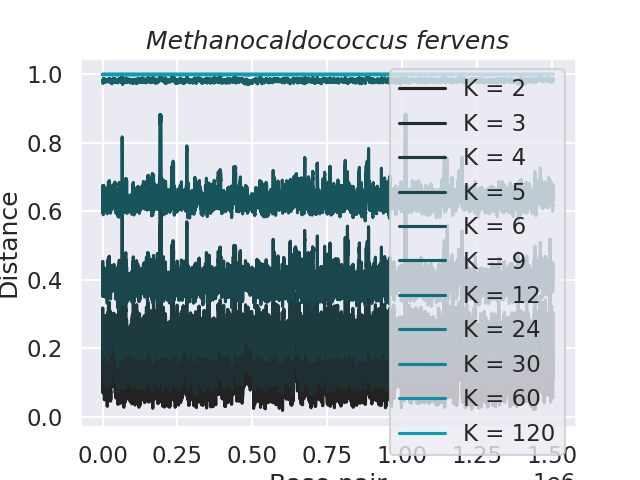

In [28]:
kmer_study(1000)

Taille de la fenêtre = 1000, avec les courbes centrées réduites et filtrées.

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


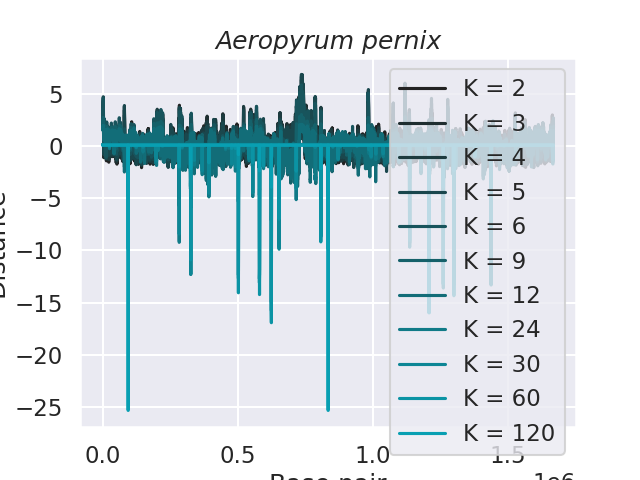

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


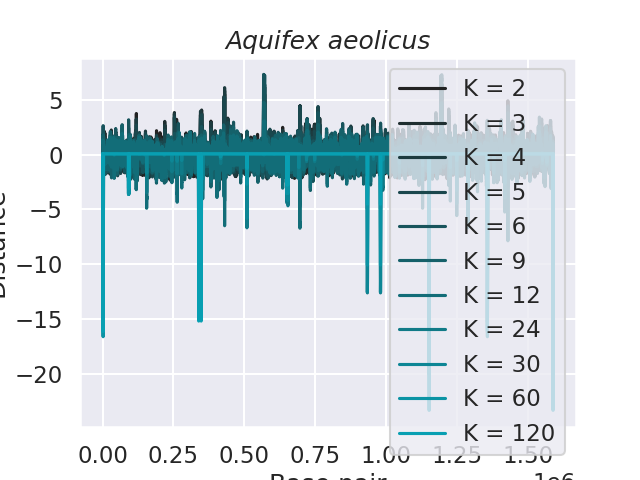

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


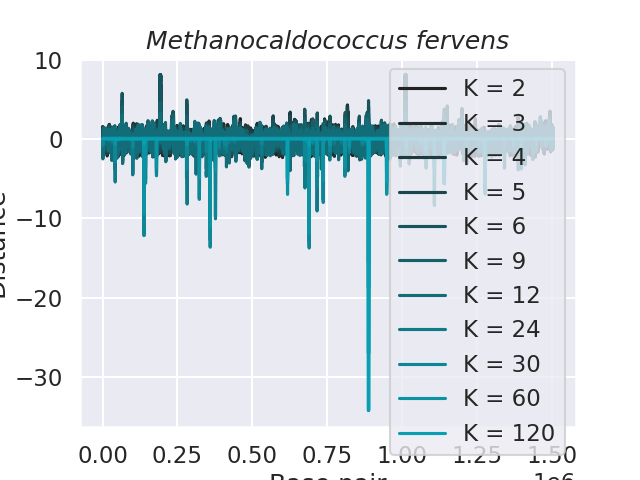

In [29]:
kmer_study(1000, normalize=True)

Taille de la fenêtre = 10000

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


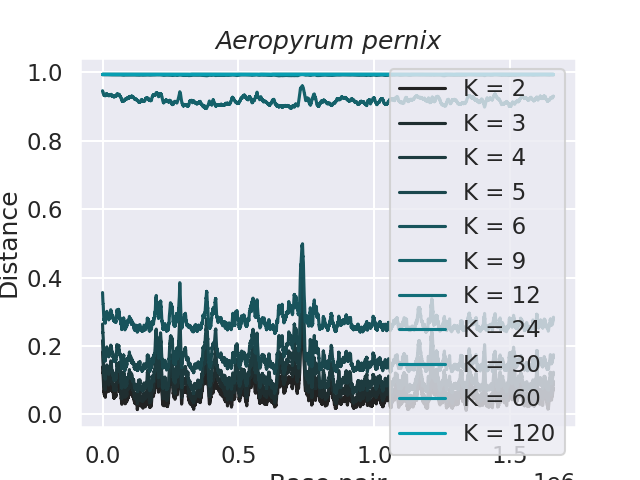

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


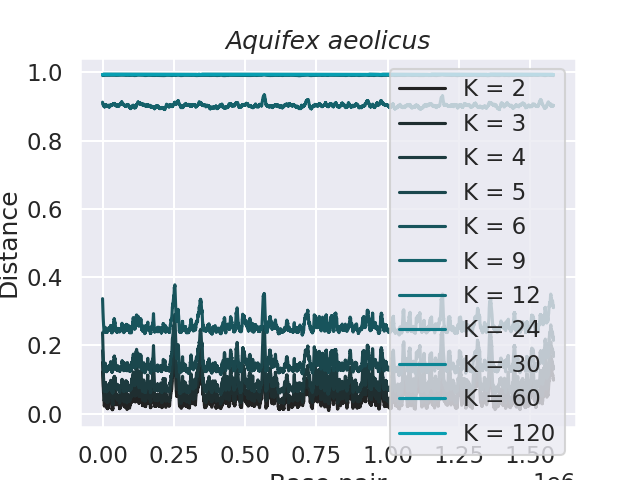

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


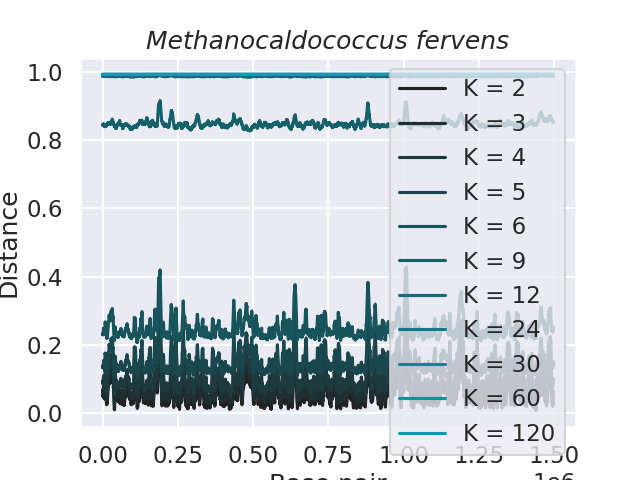

In [30]:
kmer_study(10000)

### Window size study

In [33]:
def win_size_study(
        k, color=blue, normalize=False, filt_len=20, max_win_len=None
    ):
    for s in data:
        # Initialization
        name = s["name"]
        type_ = s["type"]
        seq = s["seq"]
        win_lens = [int(w) for w in s["distances"][str(k)]]
        win_lens.sort()
        if max_win_len is not None:
            win_lens = [w for w in win_lens if w <= max_win_len]
        print("> " +FG_RED+ name +" "+FG_BLUE+ type_ +END_COLOR)
        
        plt.figure()
        sns.set_palette(sns.dark_palette(blue, len(win_lens)))
        for win_len in win_lens:
            step = win_len // 100
            distances = s["distances"][str(k)][str(win_len)]
            if normalize:
                distances = (np.array(distances) - np.mean(distances)) / np.std(distances)
            bp = list(range(0, len(distances)*step, step))
            plt.plot(bp, distances, label="Win = {:.0E}".format(win_len))
            
        # Configure plot
        plt.xlabel('Base pair')
        plt.ylabel('Distance')
        plt.title(name.replace("_", " "), fontstyle='italic')
        plt.ticklabel_format(
            style="sci", axis="x", scilimits=(0,3), useOffset=False)
        plt.legend()
    plt.show()

k = 6

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


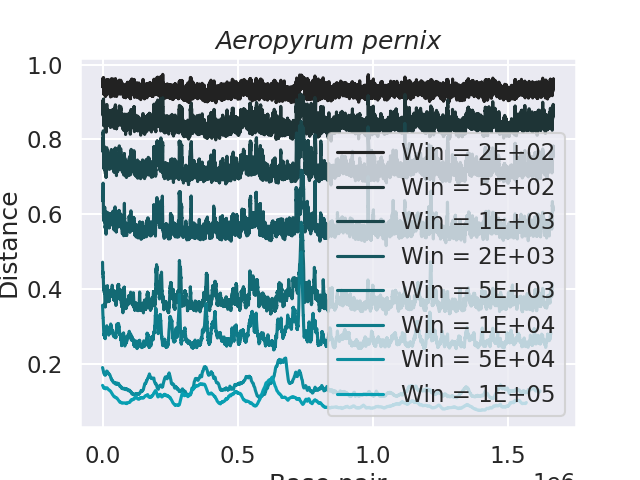

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


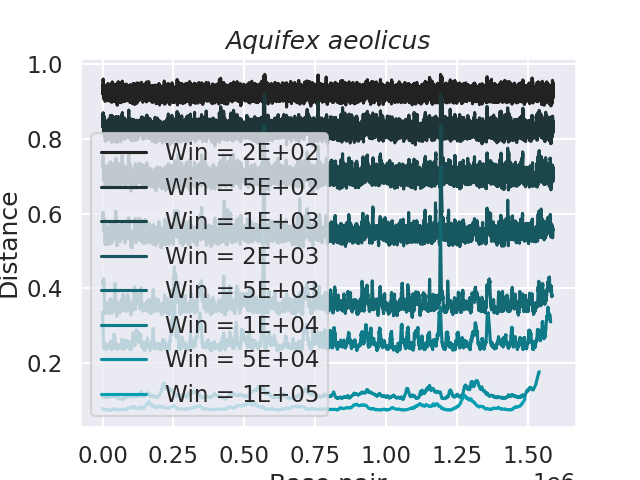

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


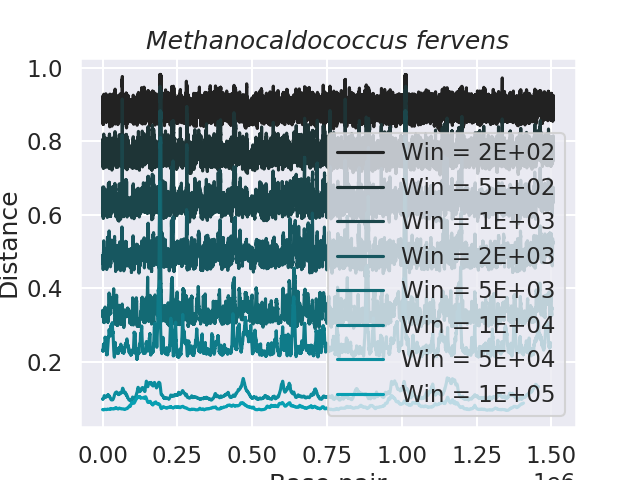

In [34]:
win_size_study(6)

k = 6, centré et réduit

> Aeropyrum_pernix archaea


<IPython.core.display.Javascript object>


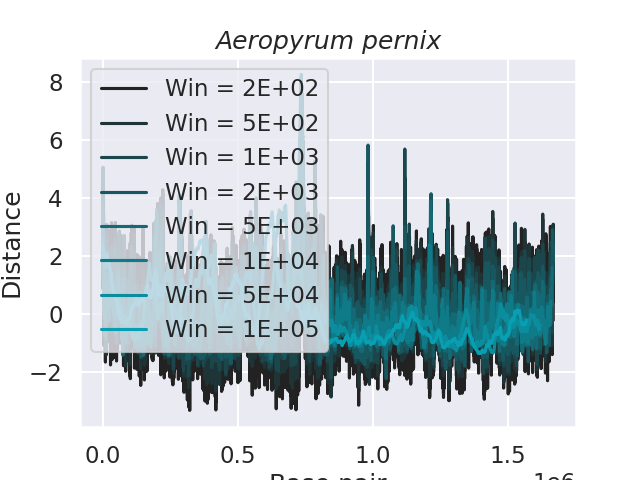

> Aquifex_aeolicus bacteria


<IPython.core.display.Javascript object>


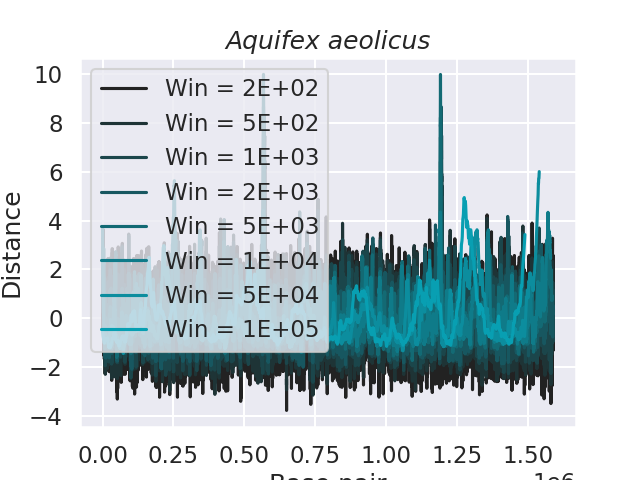

> Methanocaldococcus_fervens archaea


<IPython.core.display.Javascript object>


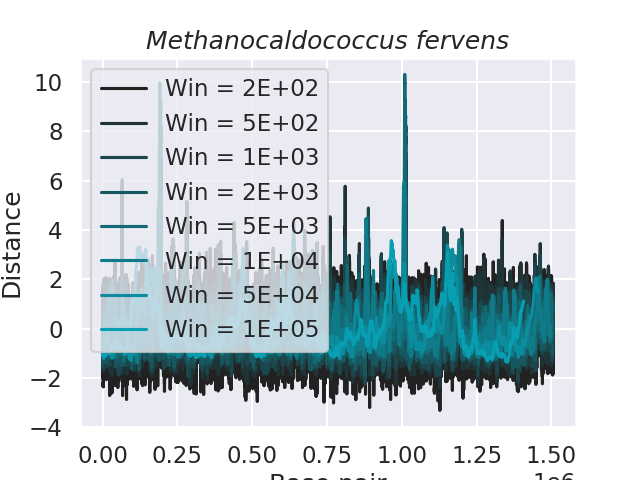

In [35]:
win_size_study(6, normalize=True)

### Comparaison avec les annotations

In [37]:
m_fervens_annotations = pd.read_csv("./data/archaea/Methanocaldococcus_fervens/annotation.csv")
for i, s in enumerate(data):
    if s["name"] == "Methanocaldococcus_fervens":
        idx_m_fervens = i
m_fervens = data[idx_m_fervens]

<IPython.core.display.Javascript object>


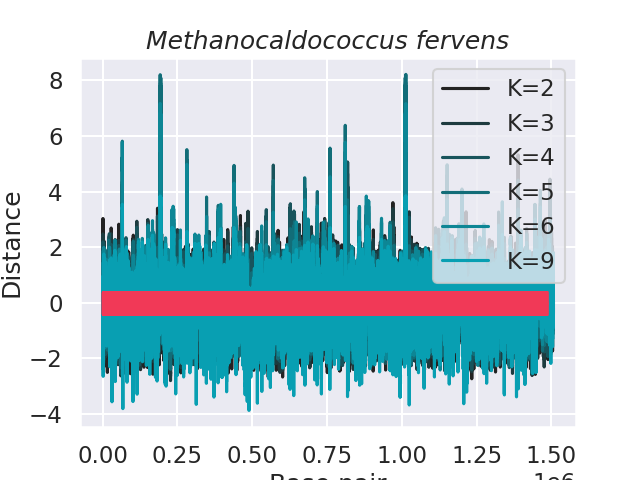

In [39]:
plt.figure()
Ks = ("2", "3", "4", "5", "6", "9")
win_len = "500"
sns.set_palette(sns.dark_palette(blue, len(Ks)))
step = int(win_len) // 100

for k in Ks:
    d = m_fervens["distances"][k][win_len]
    d = (np.array(d) - np.mean(d)) / np.std(d)
    bp = np.array(range(0, len(d)*step, step)) + int(win_len) // 2
    plt.plot(bp, d, label="K={}".format(k))
    
for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], c=red, alpha=0.8)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], c=red, alpha=0.8)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], c=red, alpha=0.8)
    
# Configure plot
plt.xlabel('Base pair')
plt.ylabel('Distance')
plt.title(m_fervens['name'].replace("_", " "), fontstyle='italic')
plt.ticklabel_format(
    style="sci", axis="x", scilimits=(0,3), useOffset=False)
plt.legend()
plt.show()

Peut-on prévoir les débuts de gènes à partir de la dérivée du signal ?

<IPython.core.display.Javascript object>


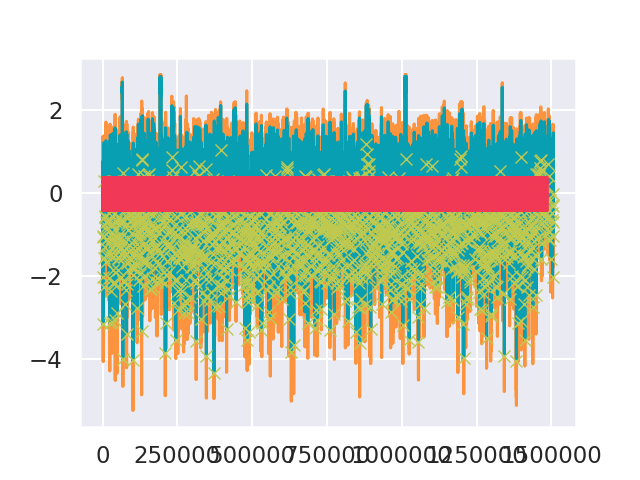

<IPython.core.display.Javascript object>


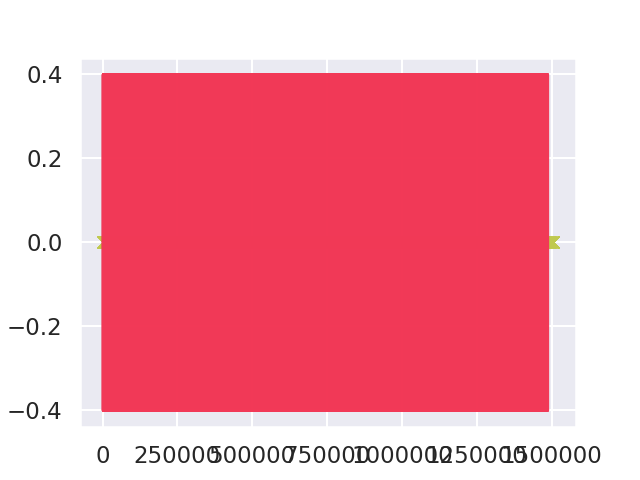

In [42]:
k = "9"
win_len = "200"
step = int(win_len) // 100

d = data[idx_m_fervens]["distances"][k][win_len]
d = (np.array(d) - np.mean(d)) / np.std(d)
bp = np.array(range(0, len(d)*step, step)) + int(win_len) // 2

filt_win = 100
filt_d = np.array(running_average(d, filt_win))
filt_bp = bp[filt_win//2:-filt_win//2]

min_idx, _ = find_peaks(-filt_d)
max_idx, _ = find_peaks(filt_d)
if min_idx[0] < max_idx[0]:
    np.delete(min_idx, 0)
if min_idx[-1] < max_idx[-1]:
    np.delete(max_idx, -1)
filt_min_idx = list()

for min_, max_ in zip(min_idx, max_idx):
    h = np.abs(filt_d[min_] - filt_d[max_])
    if h > 0.8:
        filt_min_idx.append(min_)

plt.figure()
plt.plot(bp, d, c=orange, label="raw")
plt.plot(filt_bp, filt_d, c=blue, label="filtered")
plt.plot(filt_bp[filt_min_idx], filt_d[filt_min_idx], "x", c=green)

for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], c=red, alpha=0.8)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], c=red, alpha=0.8)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], c=red, alpha=0.8)

# Configure plot
plt.xlabel('Base pair')
plt.ylabel('Distance')
plt.title(m_fervens['name'].replace("_", " "), fontstyle='italic')
plt.ticklabel_format(
    style="sci", axis="x", scilimits=(0,3), useOffset=False)
plt.legend()

plt.figure()
plt.plot(filt_bp[filt_min_idx], np.zeros((len(filt_min_idx),)), "x", c=green)
for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], c=red, alpha=0.8)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], c=red, alpha=0.8)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], c=red, alpha=0.8)
    
# Configure plot
plt.xlabel('Base pair')
plt.ylabel('Distance')
plt.title(m_fervens['name'].replace("_", " "), fontstyle='italic')
plt.ticklabel_format(
    style="sci", axis="x", scilimits=(0,3), useOffset=False)
plt.legend()

plt.show()

In [27]:
plt.figure()
Ks = ("3", "6", "9")
N = len(Ks)
win_len = "1000"
step = int(win_len) // 100
stop = int(1e5)
mean_d = np.zeros((stop,))

for k in Ks:
    distances = data[idx_m_fervens]["distances"][k][win_len]
    distances = (np.array(distances) - np.mean(distances)) / np.std(distances)
    mean_d += distances[:stop]
    bp = np.array(range(0, len(distances)*step, step)) + int(win_len) // 2
    plt.plot(bp, distances, label="K={}".format(k))
mean_bp = bp[:stop]
mean_d /= N
plt.plot(mean_bp, mean_d, 'g')
for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], 'r', alpha=0.4)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], 'r', alpha=0.4)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], 'r', alpha=0.4)
    

d = mean_d
bp = mean_bp

filt_win = 100
filt_d = np.array(running_average(d, filt_win))
filt_bp = bp[filt_win//2:-filt_win//2]

min_idx, _ = find_peaks(-filt_d)
max_idx, _ = find_peaks(filt_d)
if min_idx[0] < max_idx[0]:
    np.delete(min_idx, 0)
if min_idx[-1] < max_idx[-1]:
    np.delete(max_idx, -1)
filt_min_idx = list()

for min_, max_ in zip(min_idx, max_idx):
    h = np.abs(filt_d[min_] - filt_d[max_])
    if h > 0.3:
        filt_min_idx.append(min_)

plt.figure()
plt.plot(bp, d)
plt.plot(filt_bp, filt_d)
plt.plot(filt_bp[filt_min_idx], filt_d[filt_min_idx], "ok")

for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], 'r', alpha=0.8)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], 'r', alpha=0.8)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], 'r', alpha=0.8)
    
plt.figure()
plt.plot(filt_bp[filt_min_idx], np.zeros((len(filt_min_idx),)), "ok")
for i, row in m_fervens_annotations.iterrows():
    plt.plot([row["Start"], row["Stop"]], [0, 0], 'r', alpha=0.8)
    plt.plot([row["Start"], row["Start"]], [-0.4, 0.4], 'r', alpha=0.8)
    plt.plot([row["Stop"], row["Stop"]], [-0.4, 0.4], 'r', alpha=0.8)
    
plt.show()